<a href="https://colab.research.google.com/github/ChitandaMayaka/CMPE255-Team-Project/blob/main/DataPreprocessingAndVisualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preprocessing and Visualization

- Data Preprocessing
    - Drop all unnecessary column ['id', 'url', 'region_url', 'vin','size', 'type', 'paint_color', 'image_url', 'description', 'county', 'lat', 'long']
    - Drop duplicated row
    - Preprocessing price
      - Drop the value under 1000 and over 300000
    - Preprocessing year
      - Drop the value under 1980 and over 2020
    - Preprocessing manufacturer
      - Pair manufacturer from same model name that has manufacturer
      - Extract manufacturer name in model to fill missing value
      - Fill missing value with mode 'ford'
    - Preprocessing transmission
      - Fill missing value with mode 'automatic'
    - Encode categorical columns into numeric
- Data Visualization
  - Distribution(count) by manufacturer
  - Price range by manufacturer
  - Distribution(count) by year
  - Price ranage by year
  - Proportion by Fuel Type
  - Proportion by Vehicle Type
  - Distribution(count) by condition
  - Car location in map
  - Number of used car sold in different US states

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
# suppress future warning
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Data Preprocessing

### Drop unnecessary columns and rows and remove duplicates

In [ ]:
data = pd.read_csv('drive/Shared drives/CMPE255 Project/dataset/vehicles.csv')

In [ ]:
data.head()

id  ...      long
0  7184791621  ...  -92.2550
1  7184773187  ...  -92.4638
2  7193375964  ...  -73.1336
3  7195108810  ... -106.6650
4  7184712241  ...  -92.9648

[5 rows x 25 columns]

In [ ]:
data.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'vin', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long'],
      dtype='object')

In [ ]:
# Drop unnecessary columns
data.drop(columns=['id', 'url', 'region', 'region_url', 'vin','size', 'image_url', 'description', 'county'], inplace=True)

In [ ]:
# Remove duplicated row
data.drop_duplicates(inplace=True)

In [ ]:
data.shape

(283474, 16)

### Missing value for raw data

In [ ]:
data.isnull().sum()

price                0
year             28606
manufacturer     40907
model            31505
condition       135092
cylinders       124429
fuel             29782
odometer         75655
title_status     29336
transmission     29140
drive           103261
type             97071
paint_color     107330
state                0
lat              30446
long             30446
dtype: int64

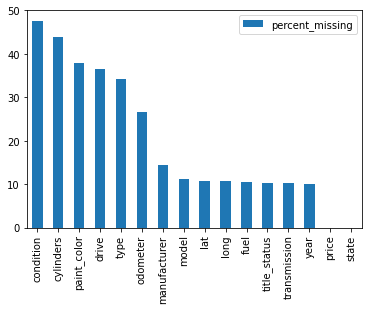

In [ ]:
percent_missing = data.isnull().sum() * 100 / len(data)
missing_value_df = pd.DataFrame({'percent_missing': percent_missing})
missing_value_df.sort_values(by = 'percent_missing', ascending=False, inplace=True)
missing_value_df.plot(kind="bar")

In [ ]:
# drop row with nan in odometer, condition, cylinders, drive, type, paint_color
data.dropna(subset=['odometer', 'condition', 'cylinders', 
                    'drive', 'type', 'paint_color'], 
            inplace=True)

In [ ]:
data.shape

(76667, 16)

### Preprocessing price

In [ ]:
# filter abnormal price data
# We can think the car whose price under $1000 are scarp
# and over $300000 are overprice
data['price'].describe()

count    7.666700e+04
mean     4.908961e+04
std      9.034748e+06
min      0.000000e+00
25%      4.900000e+03
50%      8.990000e+03
75%      1.600000e+04
max      2.490531e+09
Name: price, dtype: float64

In [ ]:
data.drop(data[data['price'] < 1000].index, inplace=True)
data.drop(data[data['price'] > 3e5].index, inplace=True)
data['price'].describe()

count     72738.000000
mean      12976.680071
std       11469.959269
min        1000.000000
25%        5450.000000
50%        9499.000000
75%       16900.000000
max      265000.000000
Name: price, dtype: float64

In [ ]:
data.shape

(72738, 16)

In [ ]:
#average_price_bymanufacturer = data.groupby('manufacturer')['price'].mean()

In [ ]:
#average_price_bymanufacturer.sort_values(ascending=False, inplace=True)

In [ ]:
# Visualize data after all preprocessing
#plt.figure(figsize=(15,10))
#ax = average_price_bymanufacturer.plot.bar()
#plt.title('Average Price by Manufacturer')
#plt.show()

In [ ]:
#average_price_byyear = data.groupby('year')['price'].mean()

In [ ]:
#plt.figure(figsize=(15,10))
#ax =average_price_byyear.plot.bar()
#plt.title('Average Price by Year')
#plt.show()

### Preprocessing year

In [ ]:
data['year'].isnull().sum()

0

In [ ]:
data['year'].describe()

count    72738.000000
mean      2008.268553
std          9.611823
min       1901.000000
25%       2005.000000
50%       2010.000000
75%       2014.000000
max       2021.000000
Name: year, dtype: float64

In [ ]:
# discard value in ['year'] smaller than 1980 and bigger than 2021
data['year'] = data['year'].loc[data['year'] > 1980]
data['year'] = data['year'].loc[data['year'] < 2021]
data['year'].describe()

count    70917.000000
mean      2009.349930
std          6.617922
min       1981.000000
25%       2006.000000
50%       2010.000000
75%       2014.000000
max       2020.000000
Name: year, dtype: float64

In [ ]:
data['year'].value_counts()

2013.0    4786
2012.0    4542
2008.0    4528
2011.0    4519
2014.0    4407
2015.0    4055
2007.0    4038
2017.0    3932
2010.0    3659
2006.0    3639
2016.0    3620
2009.0    3031
2005.0    3030
2004.0    2666
2018.0    2449
2003.0    2117
2019.0    2056
2002.0    1699
2001.0    1281
2000.0    1155
1999.0     901
1998.0     639
1997.0     580
2020.0     555
1995.0     420
1996.0     375
1994.0     337
1993.0     219
1990.0     195
1991.0     188
1989.0     187
1992.0     185
1987.0     170
1988.0     154
1986.0     151
1985.0     135
1984.0     113
1981.0      75
1983.0      73
1982.0      56
Name: year, dtype: int64

In [ ]:
# year missing percentage
data['year'].isnull().sum() / len(data)

0.025035057329043965

In [ ]:
# 2% year value is missing, the mode of year is 2013, use 2013 to fill missing value
data['year'].fillna(2013, inplace=True)

In [ ]:
data['year'] = data['year'].astype(int)

### Preprocessing manufacturer

In [ ]:
# manufacturer missing percentage
data.manufacturer.isnull().sum()/len(data)

0.04760922763892326

- use model name to look up manufacturer

In [ ]:
# clean model name by removing punctuation in model
data.model= data.model.str.replace(r'[^\w\s]+', '').str.strip().sort_values()
# check the manufacturer for model
model_to_manufacturer = data[~data.manufacturer.isnull()][["model","manufacturer"]].groupby("model").manufacturer.unique()
# use model that have only one manufacturer as a dictionary to fill the missing value for manufacturer with model name
model_to_manufacturer = model_to_manufacturer[model_to_manufacturer.map(len)==1]
model_manufacturer_dict = model_to_manufacturer.map(lambda x: x[0])
data.manufacturer.fillna(data.model.map(model_manufacturer_dict), inplace=True)

In [ ]:
# manufacturer missing percentage
data.manufacturer.isnull().sum()/len(data)

0.04624817839368693

- Extract manufacturer from model name

In [ ]:
manufacturer_list = data.manufacturer.unique()
manufacturer_list = [x for x in manufacturer_list if str(x) != 'nan']
manufacturer_list.sort()
print(manufacturer_list)

['acura', 'alfa-romeo', 'aston-martin', 'audi', 'bmw', 'buick', 'cadillac', 'chevrolet', 'chrysler', 'datsun', 'dodge', 'ferrari', 'fiat', 'ford', 'gmc', 'harley-davidson', 'honda', 'hyundai', 'infiniti', 'jaguar', 'jeep', 'kia', 'land rover', 'lexus', 'lincoln', 'mazda', 'mercedes-benz', 'mercury', 'mini', 'mitsubishi', 'morgan', 'nissan', 'pontiac', 'porche', 'ram', 'rover', 'saturn', 'subaru', 'tesla', 'toyota', 'volkswagen', 'volvo']


In [ ]:
def extractManufacturer(model_name):
  if pd.isnull(model_name):
    return np.nan
  for mf in manufacturer_list:
    if re.search(mf, model_name, re.IGNORECASE):
      return mf
  return np.nan

In [ ]:
extracted_manufacturer = data.model.apply(extractManufacturer)

In [ ]:
data.manufacturer.fillna(extracted_manufacturer, inplace=True)

In [ ]:
data.manufacturer.isnull().sum()/len(data)

0.0445709257884462

In [ ]:
data.manufacturer.value_counts()

ford               12782
chevrolet          10175
toyota              6068
honda               4447
nissan              3812
jeep                3109
dodge               2744
gmc                 2597
ram                 2179
subaru              1904
bmw                 1846
hyundai             1769
volkswagen          1746
chrysler            1453
mercedes-benz       1417
kia                 1334
cadillac            1110
mazda               1006
lexus               1000
buick                965
pontiac              735
audi                 735
acura                705
lincoln              621
volvo                562
infiniti             520
mitsubishi           393
mercury              376
mini                 359
saturn               331
rover                260
jaguar               196
fiat                 152
tesla                 25
alfa-romeo            18
datsun                16
land rover             9
harley-davidson        8
ferrari                7
aston-martin           3


In [ ]:
# still about 4% manufacturer value is still missing, as most cars are ford, use ford to fill the missing values
data.manufacturer.fillna('ford', inplace=True)

In [ ]:
# drop model column as it's no longer needed
data.drop(columns=['model'], inplace=True)

### Preprocessing transmission

In [ ]:
# transmission missing percentage
data['transmission'].isnull().sum() / len(data)

0.00023371552695977343

In [ ]:
data['transmission'].value_counts()

automatic    64079
manual        6562
other         2080
Name: transmission, dtype: int64

In [ ]:
# 0.02% transmission is missing, most cars are automatic, use automatic to fill missing value
data['transmission'].fillna('automatic', inplace=True)

In [ ]:
data.isnull().sum()

price             0
year              0
manufacturer      0
condition         0
cylinders         0
fuel              0
odometer          0
title_status      0
transmission      0
drive             0
type              0
paint_color       0
state             0
lat             566
long            566
dtype: int64

## Data Visualization

### Distribution by manufacturer

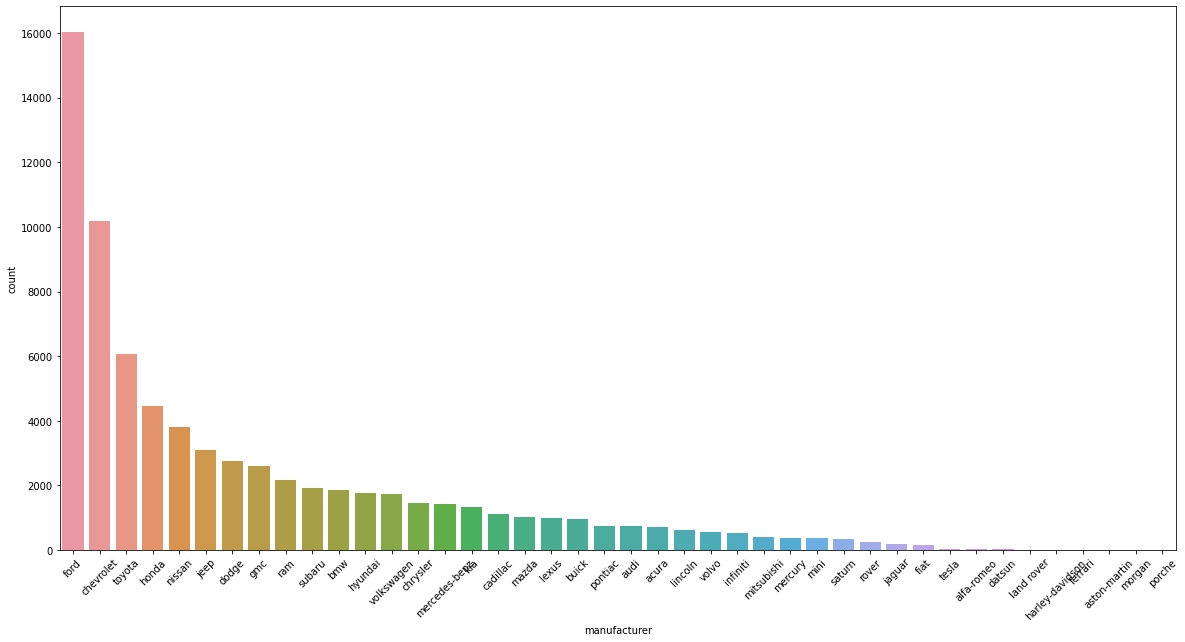

In [ ]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=45)
sns.countplot(data['manufacturer'], order = data['manufacturer'].value_counts().index)
plt.show()

The top 2 car manufacturers are Ford and Chevrolet, both are American automobile company. The next 3 popular are Japanese cars: Toyota, Honda and Nissan.

### Price Range by manufacturer

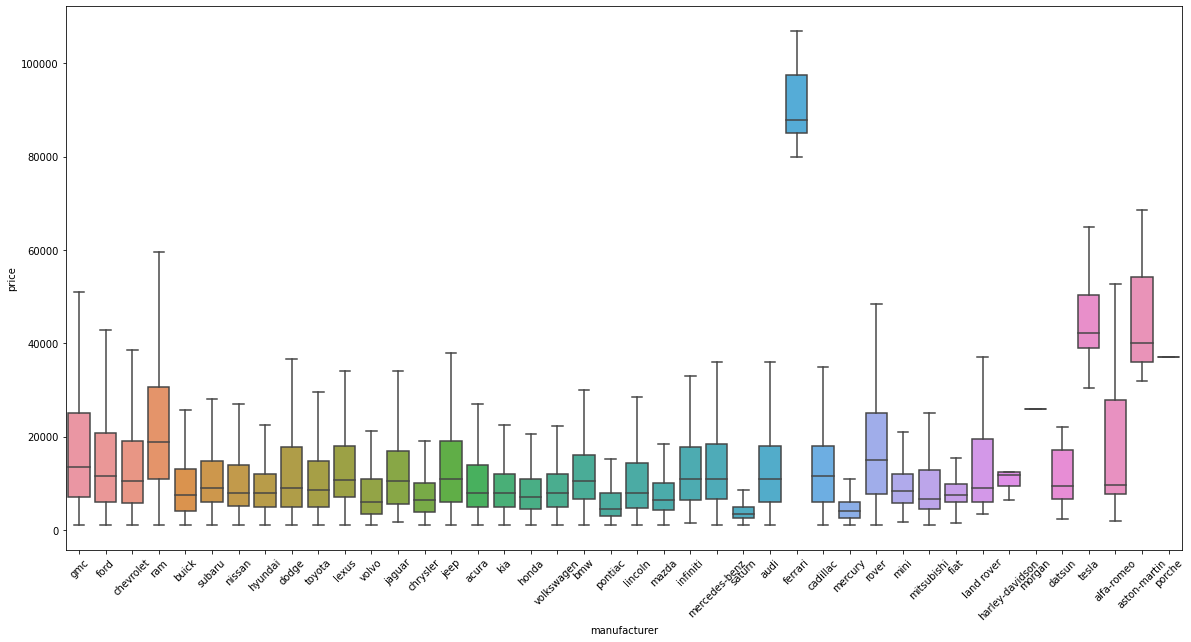

In [ ]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=45)
sns.boxplot(x='manufacturer', y='price', data=data, showfliers=False)
plt.show()

The prices for luxury car Manufacters like Ferrari or Aston Martin are significantly higher.

### Distribution by year

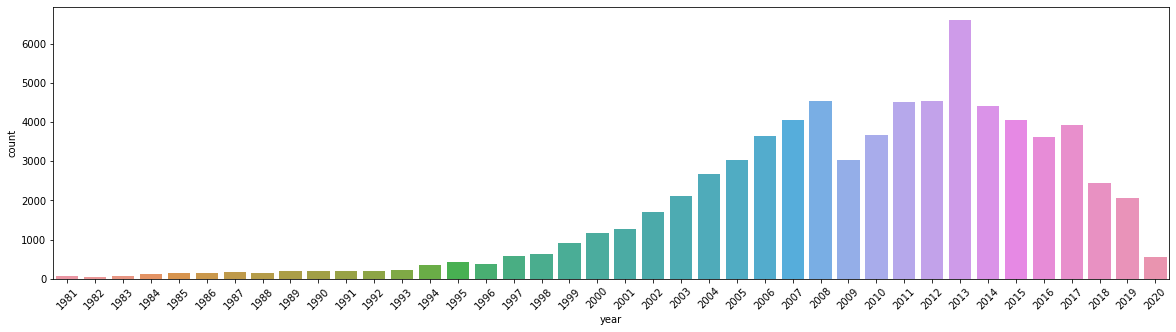

In [ ]:
plt.figure(figsize=(20,5))
plt.xticks(rotation=45)
sns.countplot(data['year'])
plt.show()

Most cars are in the recent 10 years, from 2010~2020.

### Price Range by year

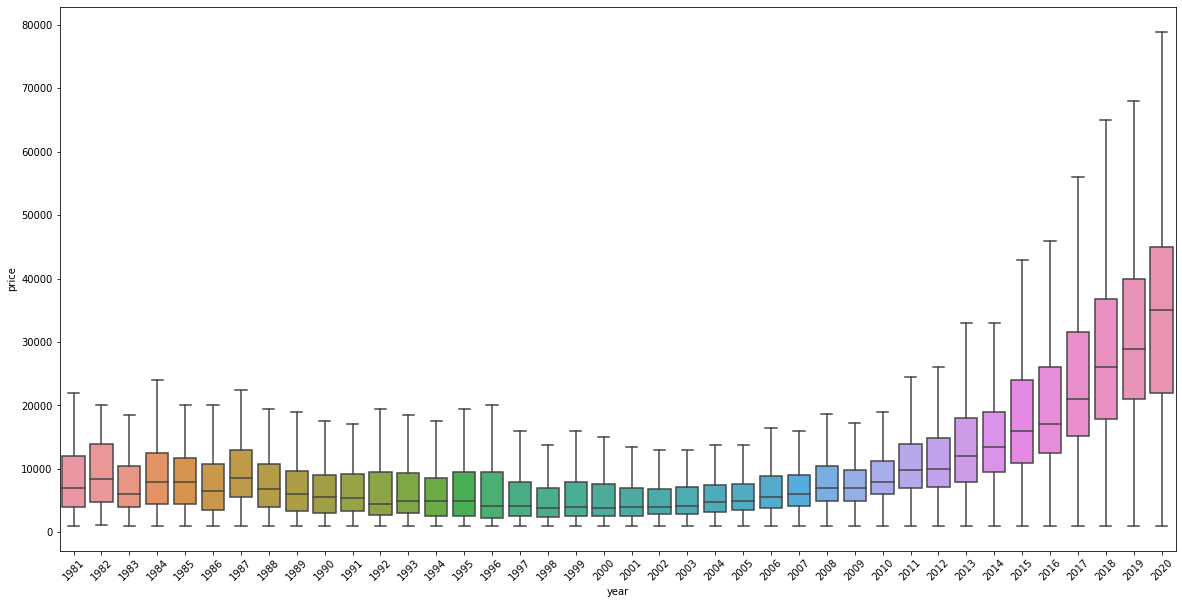

In [ ]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=45)
sns.boxplot(x='year', y='price', data=data, showfliers=False)
plt.show()

Relatively, the newer the car, the higher the price.

### Proportion by fuel type

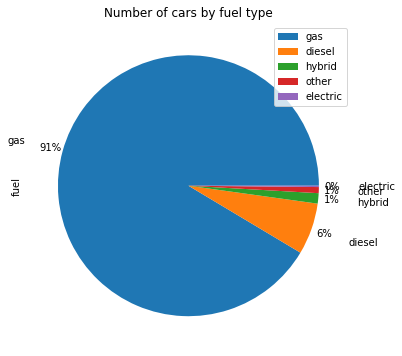

In [ ]:
data.fuel.value_counts().plot.pie(subplots=True, figsize=(11, 6), autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.3)
plt.title('Number of cars by fuel type')
plt.legend()
plt.show()

Most(91%) of the cars are gasoline cars.

### Proportion by vehicle type

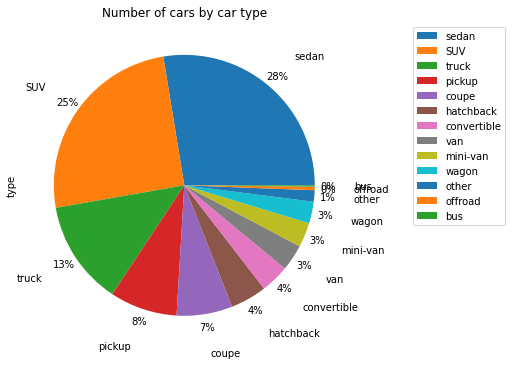

In [ ]:
data.type.value_counts().plot.pie(subplots=True, figsize=(11, 6), autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.3)
plt.title('Number of cars by car type')
plt.legend(loc="upper right", bbox_to_anchor=(1.5,1))
plt.show()

In [ ]:
# type_counts = data.type.value_counts().reset_index()
# type_counts.columns = ['type', 'count']
# fig = px.pie(type_counts, values='count', names='type')
# fig.update_traces(textposition='inside', textfont_size=14)
# fig.show()

Sedan or SUV are relatively popular

### Distribution by condition

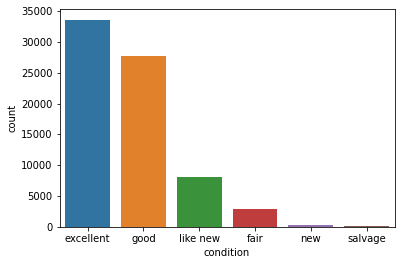

In [ ]:
sns.countplot(data.condition, order = data.condition.value_counts().index)
plt.show()

Most of used cars in sale are in excellent or good condition

### Price Range by condition

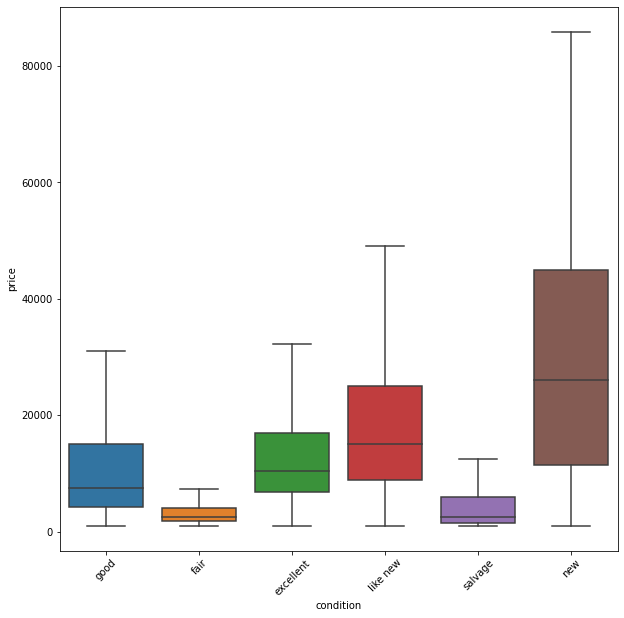

In [ ]:
plt.figure(figsize=(10,10))
plt.xticks(rotation=45)
sns.boxplot(x='condition', y='price', data=data, showfliers=False)
plt.show()

### Car location in map

In [ ]:
fig = px.scatter_mapbox(data,
                        lat="lat",
                        lon="long",
                        zoom=3,
                        hover_name="manufacturer",
                        hover_data=['price', 'year','odometer', 'title_status'],
                        )
fig.update_layout(mapbox_style="open-street-map")
fig.show()

Most on sale used cars are in the east, there are some outliers with inaccurate latitude longitude data that results in the sea.

### Number of used car sold in different US states

In [ ]:
cars_by_state = data.groupby('state').size().reset_index(name='count')
cars_by_state['state'] = cars_by_state['state'].str.upper() 
cars_by_state

state  count
0     AK    613
1     AL   1130
2     AR    553
3     AZ   1065
4     CA   4907
5     CO   1871
6     CT   1086
7     DC    519
8     DE    218
9     FL   4834
10    GA    875
11    HI    365
12    IA   2172
13    ID   1057
14    IL   1680
15    IN   1699
16    KS   1109
17    KY   1213
18    LA    469
19    MA   1914
20    MD    785
21    ME    608
22    MI   3078
23    MN   1649
24    MO    998
25    MS    359
26    MT    800
27    NC   2723
28    ND    226
29    NE    401
30    NH    607
31    NJ   1992
32    NM    795
33    NV    447
34    NY   3958
35    OH   3285
36    OK   1199
37    OR   1643
38    PA   2813
39    RI    655
40    SC   1441
41    SD    341
42    TN   1858
43    TX   2977
44    UT    197
45    VA   2312
46    VT    804
47    WA    908
48    WI   3123
49    WV    159
50    WY    248

In [ ]:
fig2 = go.Figure(data=go.Choropleth(
    locations=cars_by_state['state'],
    z = cars_by_state['count'],
    locationmode = 'USA-states',
    colorscale = 'Reds',
    colorbar_title = "Number of used cars",
))

fig2.update_layout(
    title_text = 'Number of used cars on Craiglist in US', 
    title_x=0.5,
    geo_scope='usa',
)

fig2.show()

Most on sale used cars are in the east, there are some outliers with inaccurate latitude longitude data that results in the sea.

## Finalize dataset

In [ ]:
# for training purpose we don't need lat and long, so drop these two column to finalize the dataset for training
data.drop(columns=['lat', 'long'], inplace=True)

In [ ]:
data.isnull().sum()

price           0
year            0
manufacturer    0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
type            0
paint_color     0
state           0
dtype: int64

In [ ]:
data

price  year manufacturer  condition  ... drive       type  paint_color state
4       16995  2007          gmc       good  ...   4wd      truck        white    mn
5       13995  2012         ford       good  ...   4wd      truck         grey    mn
6        7995  2010    chevrolet       good  ...   4wd        SUV         grey    mn
7        8995  2011    chevrolet       good  ...   4wd        SUV        white    mn
8       10995  2014         ford       good  ...   4wd        SUV        white    mn
...       ...   ...          ...        ...  ...   ...        ...          ...   ...
423845   1600  2004        volvo  excellent  ...   4wd      wagon         blue    ny
423849   9885  2012       subaru  excellent  ...   4wd  hatchback       silver    ct
423851   4800  2002         ford       good  ...   rwd      coupe         blue    nm
423852   1600  2006      hyundai       fair  ...   fwd      sedan         blue    mn
423853   9000  2003       toyota  excellent  ...   4wd        SUV        green    mn

[72738 rows x 13 columns]

In [ ]:
data.nunique()

price            4457
year               40
manufacturer       42
condition           6
cylinders           8
fuel                5
odometer        32740
title_status        6
transmission        3
drive               3
type               13
paint_color        12
state              51
dtype: int64

In [ ]:
data.nunique().sum()

37386

In [ ]:
# encode categeorical columns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [ ]:
# save a copy before encode
data_copy = data.copy()

In [ ]:
numerics = ['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']
categorical_columns = []
columns = data.columns.values.tolist()

for column in columns:
    if data[column].dtype in numerics: continue
    categorical_columns.append(column)

In [ ]:
# label encoding
for column in categorical_columns:
    if column in data.columns:
        le = LabelEncoder()
        data[column] = le.fit_transform(list(data[column].astype(str).values))

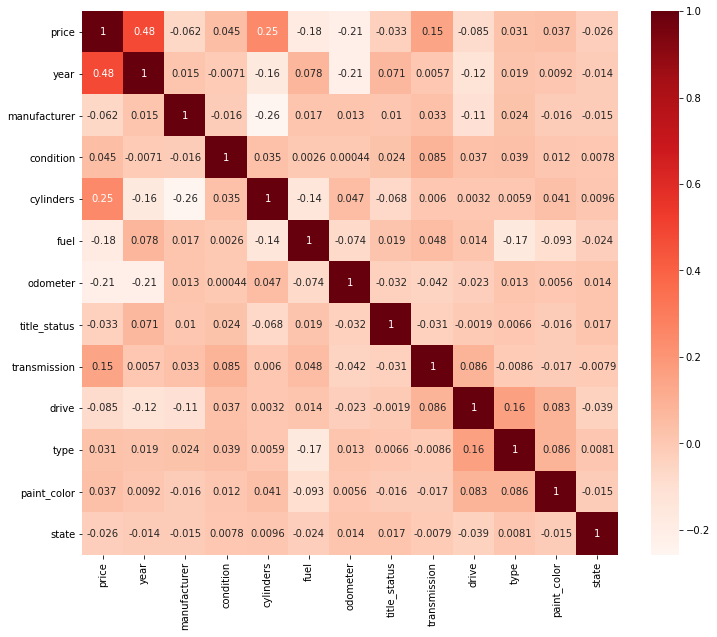

In [ ]:
# plot a correlation heatmap
plt.figure(figsize=(12,10))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [ ]:
# one hot encoding
# OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
# OH_cols = pd.DataFrame(OH_encoder.fit_transform(data[categorical_columns]))
# OH_cols.index = data.index
# num_data = data.drop(categorical_columns, axis=1)
# OH_data = pd.concat([num_data, OH_cols], axis=1)
# OH_data

In [ ]:
# normalize dataset and plot coorealtion heatmap
from sklearn.preprocessing import MinMaxScaler

In [ ]:
y = data['price']
X = data.drop(columns=['price'])

scaler = MinMaxScaler()
X_scale = scaler.fit_transform(X)


In [ ]:
# output preprocessed dataset as csv file
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scale, y, test_size=0.1, 
                                                    random_state=50)

In [ ]:
X_train_set = pd.DataFrame(X_train, columns=X.columns)
X_test_set = pd.DataFrame(X_test, columns=X.columns)
y_train_set = pd.DataFrame(y_train, columns=['price'])
y_test_set = pd.DataFrame(y_test, columns=['price'])

In [ ]:
X_train_set.to_csv('x_train.csv', index=False)
X_test_set.to_csv('x_test.csv', index=False)

y_train_set.to_csv('y_train.csv', index=False)
y_test_set.to_csv('y_test.csv', index=False)